# Data Driven Feature Selection Chapter with ML

# Random Forest Regression for aide in feature Selection

> Random Forest Regression is what is known as an ensemble machine learning (ML) algorithm. It is an algorithm that uses an ensemble of ML algorithms to make an estimation/classification decision. The basic ideas is to use a set of slightly differently constructed ML algorithms to get a less biased approximation or classification using decision trees. The forest refered to in the name is a collection of decision trees that will all get a randomized sample of the data to use for construction/learning of the tree and then all will be involved in the final decision. Decision trees are known to be heavily biased toward the training data, and by giving each tree a slightly different portion of the data each tree may be more biased to it's given training data, but all trees input will help lead to a less biased decision. For random forest regression the tree is constructed by using the given training data sample different value 

![Random Forest Regression image](./RandomForestRegression.png)


* [Link to Sklearns' RandomForest Regression Module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

* [Link to Sklearns' metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
!pip install statsmodels

In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import explained_variance_score as evs, mean_absolute_error as mae,  mean_squared_error as mse, r2_score as R2

# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import explained_variance_score as evs, mean_absolute_error as mae,  mean_squared_error as mse, r2_score as R2m
#from _products.ML_Tools import feature_importance_logger_df_mixer, make_me_a_box
import matplotlib
import matplotlib.pyplot as plt 


# Your data path
# data_path = r'C:\Users\gjone\DeepLearningDeepSolar\_Data\_SCALED_CLEANED_MODELS\PaperSet_6_28_OLR_NRML_allDROP_NOIMP.xlsx'
data_path = r'C:\Users\gjone\ConvergentDataTrainer\_Data\ConvergentMini.csv'





data_df = pd.read_csv(data_path, low_memory=False)

data_df.head(10)

#model_data = data_df.filter(items=)





,Unnamed: 0,solar_system_count,total_panel_area,fips,Bachelors #,edu_college,# PhD's,# HS Grads,# Less HS,# MS's,...,Income_x_EnergyCost,popden_x_TotOK_cnt,popden_x_TotOK_RCnt,popden_x_TotOK_Rm2,ownership_x_TotOK_cnt,ownership_x_TotOK_Rcnt,ownership_x_TotOK_Rm2,High_Solar_Areas,Low_Solar_Areas,DS_HighSolar
0,0,0,0.000000,27145011200,569,1690,13,1757,336,157,...,7588.936933,6.952926e+04,1.277294e+05,3.937895e+06,761.427170,1398.787108,43124.585296,0,1,0
1,1,21,1133.436461,27145011301,674,1434,108,767,222,285,...,5547.918385,6.067308e+05,1.102871e+06,3.382866e+07,553.848427,1006.745318,30880.168466,0,0,0
2,2,3,64.505776,27145011302,854,1459,31,1541,289,276,...,7061.118753,3.070021e+05,5.586140e+05,1.711447e+07,819.714385,1491.533392,45696.664436,0,1,0
3,3,0,0.000000,27145011304,640,1116,68,1095,231,270,...,9438.881134,9.742360e+04,1.839676e+05,5.666547e+06,550.354252,1039.248827,32010.804416,0,1,0
4,4,5,164.583303,27145011400,654,1314,15,982,163,170,...,9017.289466,1.392015e+05,2.554662e+05,7.981974e+06,474.953332,871.646840,27234.378076,0,1,0
5,5,0,0.000000,27145011500,522,1395,24,1894,442,142,...,5946.363647,6.686527e+04,1.250197e+05,3.866044e+06,584.483175,1092.822603,33793.889666,0,1,0
6,6,2,25.299013,27145011600,49,278,32,119,35,45,...,1757.686590,1.232893e+06,2.182884e+06,6.927096e+07,6.488308,11.487792,364.550070,0,1,0
7,7,0,0.000000,27145010500,242,867,10,1118,271,52,...,6809.903195,3.236139e+04,5.947869e+04,1.843640e+06,359.921836,661.519207,20504.880893,0,1,0
8,8,0,0.000000,27145011100,527,1665,6,2031,412,112,...,8032.916424,7.146022e+04,1.305291e+05,4.037531e+06,663.558106,1212.054076,37491.298011,0,1,0
9,9,10,415.365350,27145010102,1582,1949,6,1145,320,250,...,9437.826496,1.970802e+06,3.634276e+06,1.128459e+08,876.565494,1616.438776,50191.161946,0,1,0


In [3]:

# useful for showin the columns
#for v in sorted(data_df.columns.tolist()):
#    print("'{}',".format(v))

# remove all columns in checklist that 
# have only zero values
def remove_allone(df, checklist):
    for c in checklist:
        if c in df.columns.tolist():
            if df.loc[df[c] > 0, :].shape[0] == 0:
                df.drop(columns=[c], inplace=True)
    return df
    

    
# your list of predictors/independent variables
usecols = [
'Total residential solar installations ',   # 0
'Adoption',                                 # 1    

'# >= 25 years of age ',
'# 2 personhouseholds',
'# Homeowners costs > $1k.1',
'# Homeowner',
'Gender_(female)',
# 'Hot_Spots_hh',
'Nonresidential Panel Area',
'Total RPV roof tops',
'Total number of households',
'popden_x_TotOK_RCnt',
'popden_x_TotOK_Rm2',
'Daily_solar_radiation',
'PopulationDdensity',
'Median HH Income',
'Income_x_EnergyCost',
'Heating_degree_day_std',
'Family Income',
'Gender (Male)',
'Bachelors #',
'# Some college or More',
'# Nonresidential State Inc',
'# Housing Units',
'Heating Source Coal (%)',
'Cooling_degree_days_std',
# 'High_Solar_Areas',  

#  'Hot_Spots_AvgAr',
 'Housing unit count',
 
 'Total Area',
 '% Admin Occu',
 '% Agriculture Occu',
'% Arts Occu',

 '% Information Occu',
 '% Owner Occupied',
 '% Working from home',
# 'DS_HighSolar',

 'Cooling_degree_days',
'Median Age',
]


# the states you want to use
my_states = [
    #'al', 
    # 'ar', 
    #'fl', 
    #'ga', 
#     'ky', 
#     'la', 
#     'ms',
#     'nc', 
#     'ok', 
#     'sc', 
#     'tn', 
#     'tx', 
#     'va', 
    'wv',  
]



# selector_var = [
#     #'Hot_Spots_hh',
#     #'High_Solar_Areas',
#     #'T3',
#     #'NT3',
# ]


# get a list of your 2 targets
targets_l = usecols[:2]


# make a list of only the features
features_only = usecols[2:]

# make a list of all the features and 
features = usecols[2:]  + # state_abbrevs




# Fmodel_data = data_df.dropna()

# US_Model = Fmodel_data.loc[:, ].filter(items=features + targets_l[1:2])
# HS_Model =  Fmodel_data.loc[Fmodel_data[selector_var[0]] == 1, :].filter(items=features + targets_l[1:2]).copy()
# Hot_Model = Fmodel_data.loc[Fmodel_data[selector_var[1]] == 1, :].filter(items=features + targets_l[1:2]).copy()
# T3_Model =  Fmodel_data.loc[Fmodel_data[selector_var[2]] == 1, :].filter(items=features + targets_l[1:2]).copy()

# NT3_Model =  Fmodel_data.loc[Fmodel_data[selector_var[3]] == 1, :].filter(items=features + targets_l[1:2]).copy()


# model_dict = {
#     "US":US_Model,
#     "HS":HS_Model,
#     "Hot":Hot_Model,
#     "T3":T3_Model,
#     "NT3":NT3_Model,
# }


# cross validation number
CV=5

# use only your selected state data
data_df = data_df.loc[data_df['State'].isin(my_states), :]
data_df.drop(columns=['State'], inplace=True)

print(data_df.shape)
# use only your selected features
data_df = data_df.filter(items=features+targets_l)




#  get a cleaned model
Fmodel_data = data_df.dropna()







# create your random forest regressor
RF_clf = RandomForestRegressor(
                                n_estimators=5,
                                #n_estimators=100,             # how many trees?
                                #criterion='gini',             # metric to determine best split
                                criterion="mse",          # metric to determine best split
                                max_depth=2*len(features),               # how deep your tree can grow = None
                                min_samples_split=2,          # min number os samples to keep spliting
                                min_samples_leaf=1,           # min number of samples 
                                min_weight_fraction_leaf=0.0, # min value to weight a leaf 
                                max_features='auto',          # max number of features to check for best split
                                max_leaf_nodes=None,          # maximum number of leaf nodes to allow
                                min_impurity_decrease=0.0,    # how small the impurity increase can be to be considered better
                                min_impurity_split=None,     
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=2
                               )

(484, 183)


In [4]:
# makes a box plot from the given bo_data array, the columsn are used a labels for the figure
# and should be in the same order as the box data
def make_me_a_box(box_data, use_cols, title='the box plot title', fontdict=None,
                  figsize=(20,20)):
    font = {'size': 12,
            'weight': 'bold'}
    matplotlib.rc('font', **font)
    if fontdict is None:
        fontdict = {
            # 'family': 'serif',
            'family': 'sans-serif',
            # 'family': 'monospace',
            'style': 'normal',
            'variant': 'normal',
            'weight': 'heavy',
            'size': '15',
        }
    fig, ax = plt.subplots(1, 1, figsize=figsize,)
    ax.boxplot(box_data, vert=False,
                labels=use_cols, )
    # ax2.set_title('Top {} features for Permutation Importance '.format(-1 * lmt), x = -0.02)
    ax.set_title(title, fontdict=fontdict,)
    #plt.title(title, fontdict=fontdict)
    ax.set_yticklabels(use_cols, fontdict=fontdict)
    fig.tight_layout()
    plt.show()
    
def feature_importance_logger_df_mixer(params, df, usecols, runs=10, target='Adoption', label_conversion=None, tr=(.5, ),
                                       special=False, verbose=False, all_in=True, model='classifier', plot_fi_stat=True,
                                       justify=False):
    """  This will run a given number of runs of training a random forest and storing
         the feature importance's in a list, generates the random forest based on the parameters in the
         parameter argument
    :param params: dictionary for parameters of random forest
    :param X:
    :param Y:
    :param usecols:
    :param runs:
    :return:
    """
    # below dictionary will store the names of the features as keys, and lists for vals
    importance_storage = {feature: list() for feature in usecols}
    if label_conversion is None:
        importance_storage = {feature: list() for feature in usecols}
    else:
        importance_storage = {label_conversion[feature]:list() for feature in usecols}
        #print(importance_storage)
    # adjust parameters of RF based on user input
    if model == 'regression':
        params_to_use = default_RFR_params.copy()
        dict_scores = {
            'mse': list(),
            'mae': list(),
            'cod': list(),
            'R2': list(),
        }
        avg_scores = {
            'mse': 0,
            'mae': 0,
            'R2': 0,
        }
    else:
        params_to_use = default_RF_params.copy()
        dict_scores = {
            'acc': list(),
            'sen': list(),
            'prec': list(),
            'R2': list(),
        }
        avg_scores = {
            'acc': 0,
            'sen': 0,
            'prec': 0,
            'R2': 0,
        }

    for param in params:
        params_to_use[param] = params[param]
    params = params_to_use

    print('the cols ', df.columns.tolist())
    print('model type: {}'.format(model))
    #print(df.columns.tolist())
    #print(df.shape)
    rf_clf = RandomForest_Analzer(params=params, model_type=model)

    variable_rankings_list = {v:[] for v in list(importance_storage.keys())}

    for r in range(runs):
        performance_str = ''
        # RFC = build_RFC(params)
        # rf_clf = RandomForest_Analzer(params=params, model_type=model)
        cm = RMODEL(dataframe=df, columns=usecols, target=target, trtsspl=tr, justify=justify)
        #RFC.fit(cm.Xtr, cm.ytr)
        if not all_in:
            rf_clf.fit(x=cm.Xtr, y=cm.ytr, )
            rf_clf.score(X=cm.Xts, y=cm.yts)
            print('Run: {}/{}\n\t:=Testing: {}, Training: {}, Orig: {}/{}'.format(r + 1, runs, cm.Xts.shape[0], cm.Xtr.shape[0], cm.X.shape[0],
                                                                    cm.Xts.shape[0] + cm.Xtr.shape[0]))
            print("\t:=Training avg: {}, Testing avg: {}".format(cm.ytr.mean()[0], cm.yts.mean()[0]))

        else:
            rf_clf.fit(x=cm.X, y=cm.Y, )
            rf_clf.score(X=cm.X, y=cm.Y)
            # store the different scoring metrics for this run

        #for v in list(variable_rankings_list.keys()):
        for v in list(rf_clf.feature_ranking_storage.keys()):
            if label_conversion is not None:
                cv = label_conversion[v]
            else:
                cv = v
            variable_rankings_list[cv].append(rf_clf.feature_ranking_storage[v])

        # store the different scoring metrics for this run
        for pm in list(rf_clf.score_dict.keys()):
            dict_scores[pm].append(rf_clf.score_dict[pm])
            performance_str += '{}: {:.3f} '.format(pm, rf_clf.score_dict[pm])
        print('\tPerformance: {}'.format(performance_str))
        print('------------------------------------------------')
        #feature_importance = rf_clf.feature_importances_
        #feats = display_significance(feature_importance, usecols, verbose=False, reverse=False)
        #for feature in importance_storage:
        for feature in rf_clf.FI:
            imp = rf_clf.FI[feature]
            if label_conversion is not None:
                feature = label_conversion[feature]
            importance_storage[feature].append(imp)

    # now get the average for all scoreing metrics
    for pm in list(dict_scores.keys()):
        avg_scores[pm] = np.mean(dict_scores[pm])
    variable_rankings_list_std = {}
    variable_rankings_list_mu = {}
    #variable_rankings_list_std = {}

    for v in list(variable_rankings_list.keys()):
        variable_rankings_list_std[v] = [np.std(variable_rankings_list[v])]
        variable_rankings_list_mu[v] = [np.mean(variable_rankings_list[v])]

    # the the averages for each feature
    #if label_conversion is None:
    avg_importance = sort_dict({feat:np.mean(importance_storage[feat]) for feat in importance_storage}, reverse=False)
    feature_list = [importance_storage[feat] for feat in avg_importance]
    #else:
    #    avg_importance = sort_dict({label_conversion[feat]:np.mean(importance_storage[feat]) for feat in importance_storage}, reverse=False)
    #    feature_list = [importance_storage[feat] for feat in avg_importance]
    #print('the sorted average importance')
    #print(avg_importance)

    if special:
        if plot_fi_stat:
            return feature_list, list(avg_importance.keys()), cm, rf_clf.learner, avg_scores, \
                   pd.DataFrame(variable_rankings_list_std), pd.DataFrame(variable_rankings_list_mu)

        return feature_list, list(avg_importance.keys()), cm, rf_clf.learner, avg_scores



    return feature_list, list(avg_importance.keys())  



def make_box_data(feat_imp, ignorelist):
    ret_list, labels = list(), list()

    for feat in feat_imp:
        if feat not in ignorelist:
            ret_list.append(feat_imp[feat])
            labels.append(feat)
    return ret_list, labels
    
    
def avg_calculator(x, reverse=False):
    ret_d = dict()
    for vi in x:
        ret_d[vi[0]] = np.mean(vi[1]) 
    return dict(sorted(ret_d.items(), key=lambda x: np.mean(x[1]), reverse=reverse))

def g_cross_val_split(LRNR, X, y, features, target, cols=None, cv=3, scorers=None):
    kf = KFold(n_splits=cv)
    scr_d = dict()
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        #print("X Train: \n{}".format(X_train))
        #print("X Test: \n{}".format(X_test))
        y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
        #print("Y Train: \n{}".format(y_train))
        #print("Y Test: \n{}".format(y_test))
        # X_train, y_train, X_test, y_test
        LRNR.fit(X_train, y_train)
        ypred = LRNR.predict(X_test)
        for k in scorers:
            scr = scorers[k](y_test, ypred)
            scr_d[k] = [scr]
        yield scr_d, LRNR

scorers = {"R2":R2, "evs":evs, "mae":mae, "mse":mse}
        
def g_cross_val_RF_trainer(X_aa, y_aa, RF_clf, features=None, target=None, cv=2, scorers=scorers, reverse=True):
    if features is None:
        features = X_aa.columns.tolist()
    
    # make dictionary to store the feature importances for the k fold runs
    columns = X_aa.columns.tolist()
    feature_dict = {v:[] for v in columns}
    scores_list = list()
    scores_dict = {k:[] for k in list(scorers.keys())}
    # training_results = g_cross_val_split(X_aa, y_aa, features=list(range(D))[0:4], target=0, cv=cv)
    print("=======================================================================")
    for i in g_cross_val_split(RF_clf, X_aa, y_aa, features=features, target=target, cv=cv, scorers=scorers):
        print('\n======')
        print("score: {}".format(i[0]))
        print("Features: {}".format(i[1].feature_importances_))
        for k in i[0]:
            scores_dict[k] += i[0][k]
        #scores_list.append(i[0])
        cnt = 0
        for k in feature_dict:
            feature_dict[k].append(i[1].feature_importances_[cnt])
            cnt += 1
    
        print('======\n')


    print(list(scores_dict.items()))
    
    scores_dict = dict(sorted(scores_dict.items(), key=lambda x: np.mean(x[1])))
    # avg_calculator = lambda x: (x[0],np.mean(x[1]))

    avg_scores = avg_calculator(list(scores_dict.items()))
    print("scores = {}".format(scores_dict))
    print("Average: {}".format(avg_scores))

    print("Feature importances over run")
    feature_dict = dict(sorted(feature_dict.items(), key=lambda x: np.mean(x[1]), reverse=False))

    for k in feature_dict:
         print("{}: {}".format(k, feature_dict[k]))
    print("average feature importance dict")
    avg_feats = {k:np.mean(feature_dict[k]) for k in feature_dict}
    avg_feats = dict(sorted(avg_feats.items(), key=lambda x: x[1], reverse=True))

    for k in avg_feats:
        print("{}: {}".format(k, avg_feats[k]))
    return feature_dict, avg_feats, scores_dict, avg_scores




In [ ]:
from scipy import stats
import matplotlib.pyplot as plt 
# model_choice = FModel_data

cv=5

X_vars = features 

Y_vars = targets_l[0:1]


Xo = Fmodel_data.filter(items=X_vars)

# X = sm.add_constant(Xo)

Y = Fmodel_data.filter(items=Y_vars)


# use stats models to do a linear regression
#model = sm.OLS(Y,X)
#results = model.fit()

#target = target_l[1]
#print(results.summary())

# print(results.pvalues)


#RF_clf.fit(X, ytr)

# print(cross_val_score(RF_clf, Xo, Y, cv=3))

# feature_importance_dict = {lbl:imp for imp, lbl in zip(RF_clf.feature_importances_, X_vars)}

# feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1]))

# for fi in feature_importance_dict:
#     print("{}: {},".format(fi, feature_importance_dict[fi]))

# do a cross validation run with RF
feature_dict, avg_feats, scores_dict, avg_score = g_cross_val_RF_trainer(Xo, Y, RF_clf, features=X_vars, target=Y_vars, cv=CV, scorers=scorers)

boxData, labels = make_box_data(feature_dict, ignorelist=[])

print(boxData)
print(labels)

make_me_a_box(boxData, labels, title="{}: Feature Importance".format(my_states))


c:\users\gjone\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\gjone\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:192: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


                                      OLS Regression Results                                      
Dep. Variable:     Total residential solar installations    R-squared:                       0.344
Model:                                                OLS   Adj. R-squared:                  0.297
Method:                                     Least Squares   F-statistic:                     7.369
Date:                                    Fri, 02 Jul 2021   Prob (F-statistic):           1.12e-24
Time:                                            17:02:46   Log-Likelihood:                -778.47
No. Observations:                                     468   AIC:                             1621.
Df Residuals:                                         436   BIC:                             1754.
Df Model:                                              31                                         
Covariance Type:                                nonrobust                                         
          

c:\users\gjone\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:192: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



score: {'R2': [0.056304943418701625], 'evs': [0.06221481040301757], 'mae': [1.168085106382979], 'mse': [2.689787234042553]}
Features: [0.02098036 0.02440167 0.03595262 0.01040373 0.00523486 0.06282204
 0.01336477 0.01067353 0.21994844 0.0334892  0.01302579 0.00817174
 0.02491532 0.01650856 0.02832094 0.01614272 0.01157685 0.03383269
 0.06229021 0.         0.01840008 0.01023102 0.02342929 0.00992066
 0.01612059 0.02848255 0.04492888 0.03849755 0.02538977 0.0400227
 0.03832798 0.03337837 0.02081449]



c:\users\gjone\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:192: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



score: {'R2': [-0.7881986048420189], 'evs': [-0.5711284366023803], 'mae': [1.0], 'mse': [1.9727659574468084]}
Features: [0.0143159  0.0269365  0.02027363 0.01867599 0.02226775 0.02192787
 0.03824226 0.0117263  0.09470376 0.07578696 0.00627701 0.01342839
 0.01365066 0.01899918 0.02193903 0.02192617 0.01317917 0.01860653
 0.10805118 0.         0.02432695 0.01597122 0.02543477 0.01046499
 0.03272594 0.04874731 0.04586344 0.0321269  0.03130984 0.03379431
 0.0289382  0.04710201 0.04227986]



c:\users\gjone\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:192: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



score: {'R2': [0.15174263904034924], 'evs': [0.1671683024354783], 'mae': [1.086021505376344], 'mse': [2.698064516129032]}
Features: [0.01046383 0.02224459 0.01259774 0.02113892 0.01148799 0.02455051
 0.02891022 0.02070956 0.06635416 0.04454943 0.0072146  0.05500271
 0.0170594  0.01844129 0.05763609 0.02294126 0.01738185 0.0340367
 0.08352904 0.         0.01090859 0.03102712 0.03878716 0.01654818
 0.01730372 0.04617978 0.07318968 0.02162848 0.0356433  0.01356472
 0.04813915 0.03162101 0.03920922]



c:\users\gjone\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:192: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



score: {'R2': [-0.18399762611275983], 'evs': [-0.1597816023738874], 'mae': [0.9870967741935485], 'mse': [2.3066666666666666]}
Features: [0.01203882 0.01006363 0.01257808 0.01504483 0.00919719 0.03848301
 0.01439361 0.01435844 0.06460593 0.09843918 0.01523696 0.01033015
 0.02238847 0.02080662 0.05869631 0.0208052  0.01422975 0.01596143
 0.06865754 0.         0.03758478 0.02182653 0.05773893 0.03629697
 0.01743674 0.02411222 0.04243976 0.02408808 0.03824918 0.02579604
 0.02937005 0.07761248 0.0311331 ]

[('R2', [0.08823657587548639, 0.056304943418701625, -0.7881986048420189, 0.15174263904034924, -0.18399762611275983]), ('evs', [0.10776031128404673, 0.06221481040301757, -0.5711284366023803, 0.1671683024354783, -0.1597816023738874]), ('mae', [1.2851063829787235, 1.168085106382979, 1.0, 1.086021505376344, 0.9870967741935485]), ('mse', [2.6519148936170214, 2.689787234042553, 1.9727659574468084, 2.698064516129032, 2.3066666666666666])]
scores = {'R2': [0.08823657587548639, 0.0563049434187016

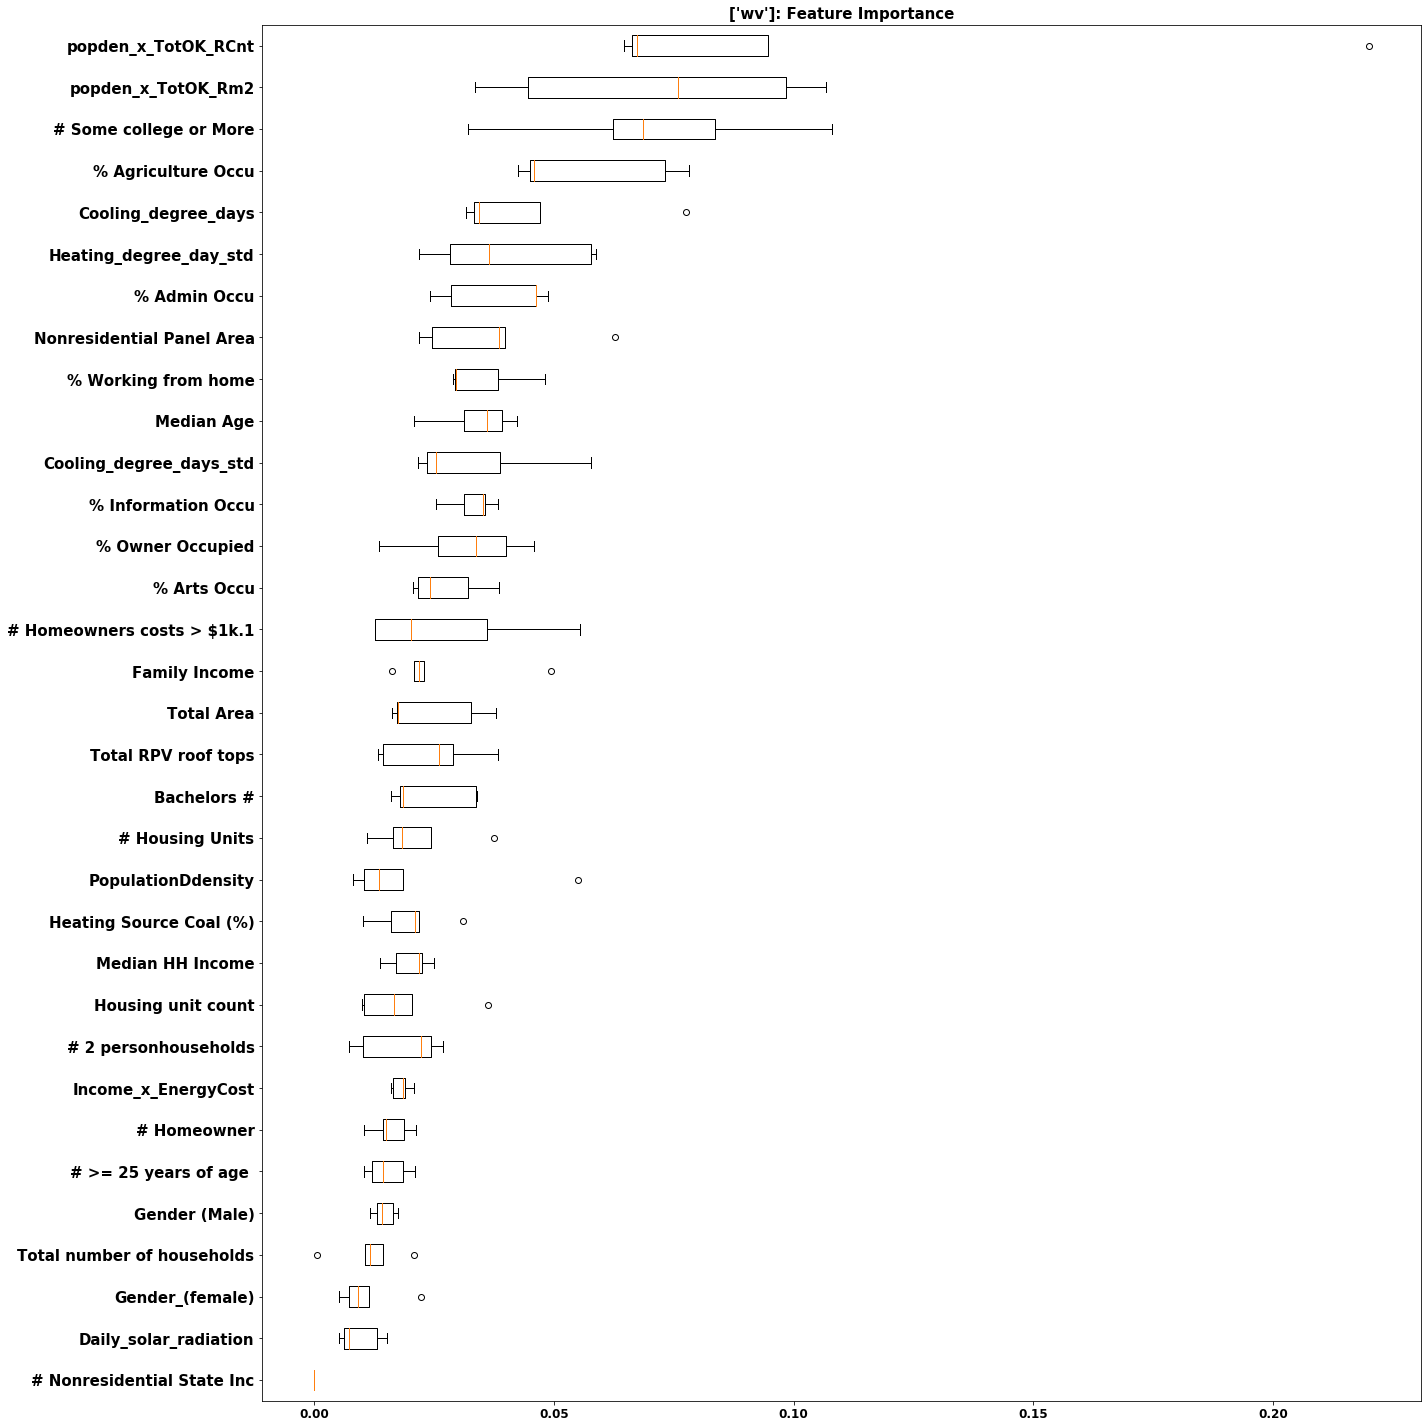